Image shape: (256, 256, 3)


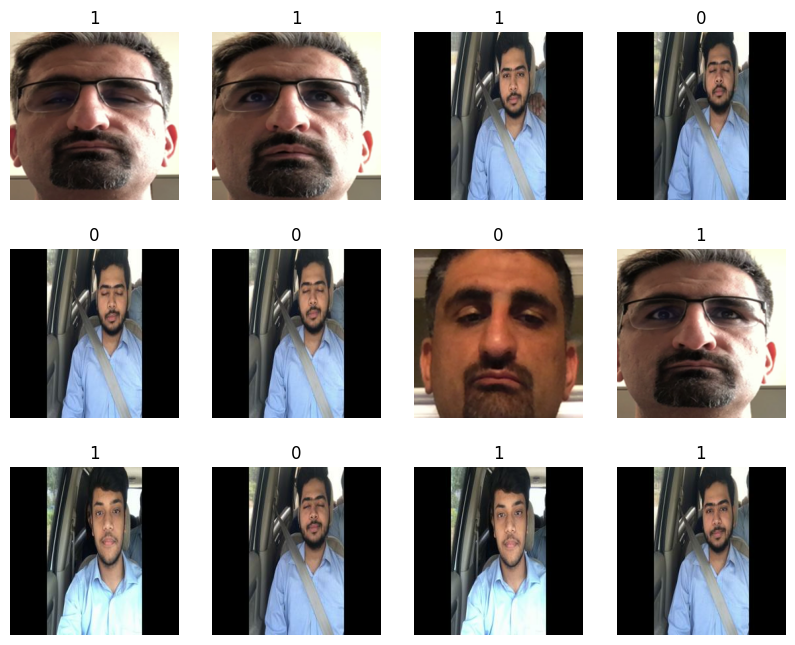

In [4]:
# Display a batch of images
plt.figure(figsize=(10, 8))  # Set figure size

for image_batch, label_batch in dataset.take(1):  # Take one batch
    for i in range(12):  
        ax = plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert float to uint8
        plt.title(class_names[label_batch[i].numpy()])  # Fix: Use correct class names list
        plt.axis("off")  # Hide axes
    
    print("Image shape:", image_batch[0].shape)  # Print only once outside loop

plt.show()  # Display the images

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Constants
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, CHANNELS)
EPOCHS = 50

# Define CNN Model
model = models.Sequential([
    # Rescaling
    layers.Rescaling(1./255, input_shape=INPUT_SHAPE),
    
    # Data Augmentation
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # Conv Layers
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary Classification
])

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Smaller LR for better stability
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()


C:\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,629,953 (32.92 MB)

 Trainable params: 8,629,953 (32.92 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import os
# Define dataset path
dataset_path = r"G:\FARM_PROJECT\farm-Drowssiness_Detection\training\Datasets"  # Update this path

# Verify if dataset path exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Directory not found: {dataset_path}")

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    labels='inferred',  # Automatically assigns labels based on folder names (0, 1)
    label_mode='int',   # Labels will be integers (0 and 1)
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE)
)

# Get class names
class_names = dataset.class_names
print(f"Class names: {class_names}")  # Should print: ['0', '1']

# Function to split dataset
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds

# Split dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(f"Training Dataset: {len(train_ds)} batches, {len(train_ds) * BATCH_SIZE} images")
print(f"Validation Dataset: {len(val_ds)} batches, {len(val_ds) * BATCH_SIZE} images")
print(f"Test Dataset: {len(test_ds)} batches, {len(test_ds) * BATCH_SIZE} images")


Found 1430 files belonging to 2 classes.
Class names: ['0', '1']
Training Dataset: 36 batches, 1152 images
Validation Dataset: 4 batches, 128 images
Test Dataset: 5 batches, 160 images


In [7]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,  # ✅ Fix: Use "validation_data=" instead of "val_ds,"
    callbacks=[lr_scheduler],  # ✅ No syntax issue here
)



Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6037 - loss: 0.6422 - val_accuracy: 0.6641 - val_loss: 0.5942 - learning_rate: 1.0000e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6914 - loss: 0.5634 - val_accuracy: 0.7266 - val_loss: 0.5002 - learning_rate: 1.0000e-04
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6843 - loss: 0.5232 - val_accuracy: 0.6484 - val_loss: 0.5325 - learning_rate: 1.0000e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7224 - loss: 0.4847 - val_accuracy: 0.8125 - val_loss: 0.4502 - learning_rate: 1.0000e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7175 - loss: 0.4906 - val_accuracy: 0.7188 - val_loss: 0.4925 - learning_rate: 1.0000e-04
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6820 - loss: 0.5143 - val_accuracy: 0.8203 - val_loss: 0.4337 - learning_rate: 1.0000e-04
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7671 - loss:

In [8]:
accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy[1] * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.9359 - loss: 0.1263
Test Accuracy: 93.12%


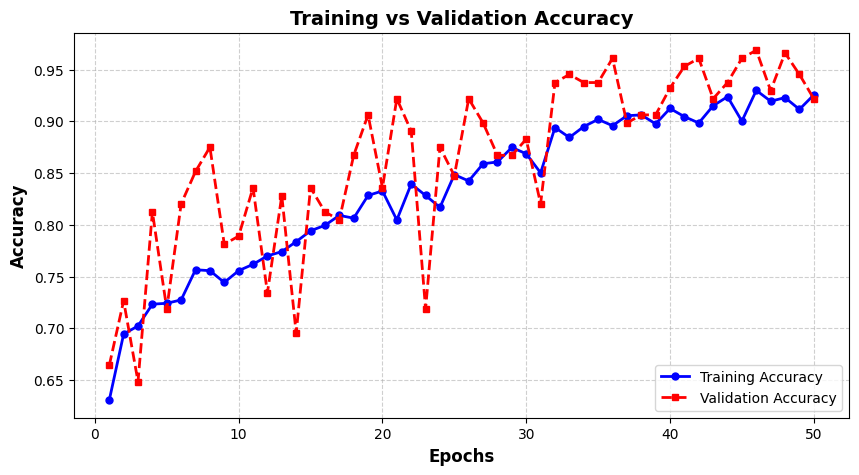

In [11]:
import matplotlib.pyplot as plt

# Extract accuracy values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

EPOCHS = len(acc)  # Get the number of completed epochs

plt.figure(figsize=(10, 5))  # Set figure size

# Training Accuracy Plot
plt.plot(range(1, EPOCHS + 1), acc, label='Training Accuracy', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(1, EPOCHS + 1), val_acc, label='Validation Accuracy', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)

# Labels, Title, and Grid
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


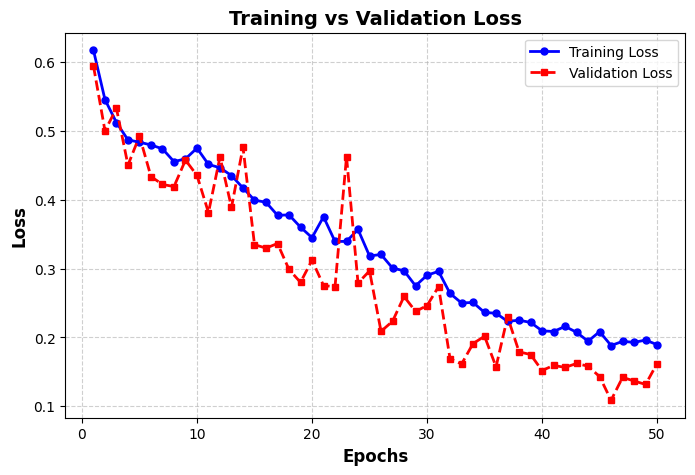

In [15]:
import matplotlib.pyplot as plt

# Extract loss values from history
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(loss)  # Get the number of completed epochs

plt.figure(figsize=(8, 5))  # Set figure size

# 📉 Training vs Validation Loss Plot
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)

# Labels, Title, and Grid
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Loss", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Loss", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


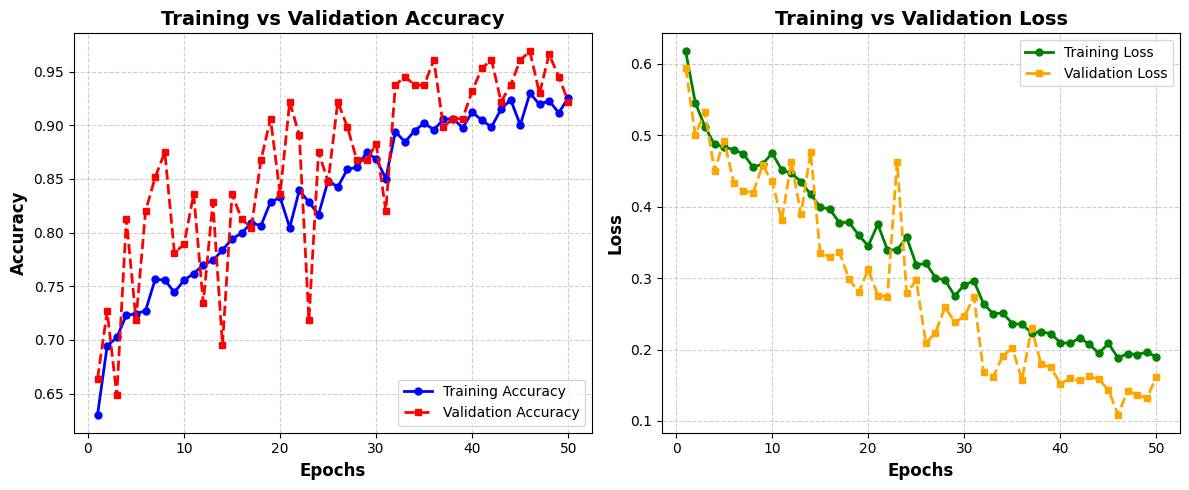

In [14]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = len(acc)  # Get the actual number of epochs

plt.figure(figsize=(12, 5))  # Wider figure for better readability

# 📈 Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(range(1, EPOCHS + 1), acc, label='Training Accuracy', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(1, EPOCHS + 1), val_acc, label='Validation Accuracy', color='red', linestyle='--', linewidth=2, marker='s', markersize=5)
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# 📉 Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(range(1, EPOCHS + 1), loss, label='Training Loss', color='green', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.plot(range(1, EPOCHS + 1), val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2, marker='s', markersize=5)
plt.xlabel("Epochs", fontsize=12, fontweight='bold')
plt.ylabel("Loss", fontsize=12, fontweight='bold')
plt.title("Training vs Validation Loss", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout()  
plt.show()



📌 First Image to Predict:


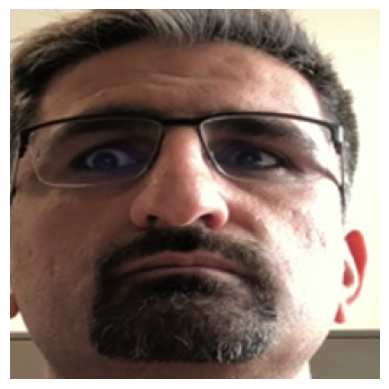

✅ Actual Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
🔮 Predicted Label: 1
📊 Prediction Probability: 1.000000


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from the dataset
for image_batch, label_batch in dataset.take(1):  
    first_image = image_batch[0].numpy().astype('uint8')  # Convert tensor to uint8 image
    first_label = label_batch[0].numpy()  # Convert tensor to numpy integer
    
    print("\n📌 First Image to Predict:")
    plt.imshow(first_image)
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"✅ Actual Label: {class_names[first_label]}")  

    # Make predictions on the batch
    batch_prediction = model.predict(image_batch)
    
    # Extract scalar value using `.item()` to avoid deprecation warning
    predicted_class = int(batch_prediction[0].item() > 0.5)  

    print(f"🔮 Predicted Label: {class_names[predicted_class]}")
    print(f"📊 Prediction Probability: {batch_prediction[0][0]:.6f}")



📌 First Image to Predict:


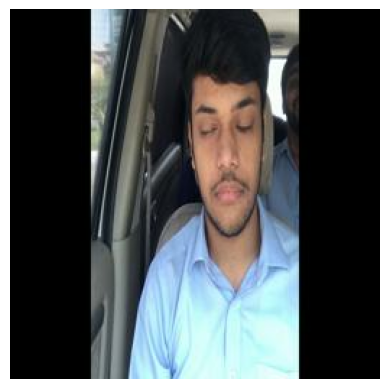

✅ Actual Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
🔮 Predicted Label: 0
📊 Prediction Probability: 0.000722


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from the dataset
for image_batch, label_batch in dataset.take(1):  
    first_image = image_batch[0].numpy().astype('uint8')  # Convert tensor to uint8 image
    first_label = label_batch[0].numpy()  # Convert tensor to numpy integer
    
    print("\n📌 First Image to Predict:")
    plt.imshow(first_image)
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"✅ Actual Label: {class_names[first_label]}")  

    # Make predictions on the batch
    batch_prediction = model.predict(image_batch)
    
    # Extract scalar value using `.item()` to avoid deprecation warning
    predicted_class = int(batch_prediction[0].item() > 0.5)  

    print(f"🔮 Predicted Label: {class_names[predicted_class]}")
    print(f"📊 Prediction Probability: {batch_prediction[0][0]:.6f}")



📌 First Image to Predict:


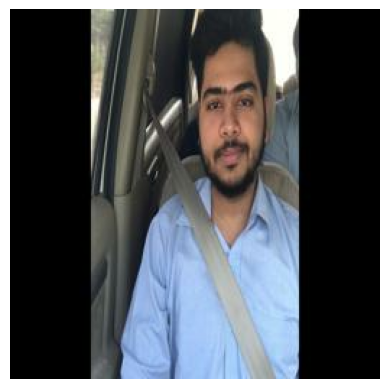

✅ Actual Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
🔮 Predicted Label: 1
📊 Prediction Probability: 0.856701


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Take one batch from the dataset
for image_batch, label_batch in dataset.take(1):  
    first_image = image_batch[0].numpy().astype('uint8')  # Convert tensor to uint8 image
    first_label = label_batch[0].numpy()  # Convert tensor to numpy integer
    
    print("\n📌 First Image to Predict:")
    plt.imshow(first_image)
    plt.axis('off')  # Hide axes
    plt.show()

    print(f"✅ Actual Label: {class_names[first_label]}")  

    # Make predictions on the batch
    batch_prediction = model.predict(image_batch)
    
    # Extract scalar value using `.item()` to avoid deprecation warning
    predicted_class = int(batch_prediction[0].item() > 0.5)  

    print(f"🔮 Predicted Label: {class_names[predicted_class]}")
    print(f"📊 Prediction Probability: {batch_prediction[0][0]:.6f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


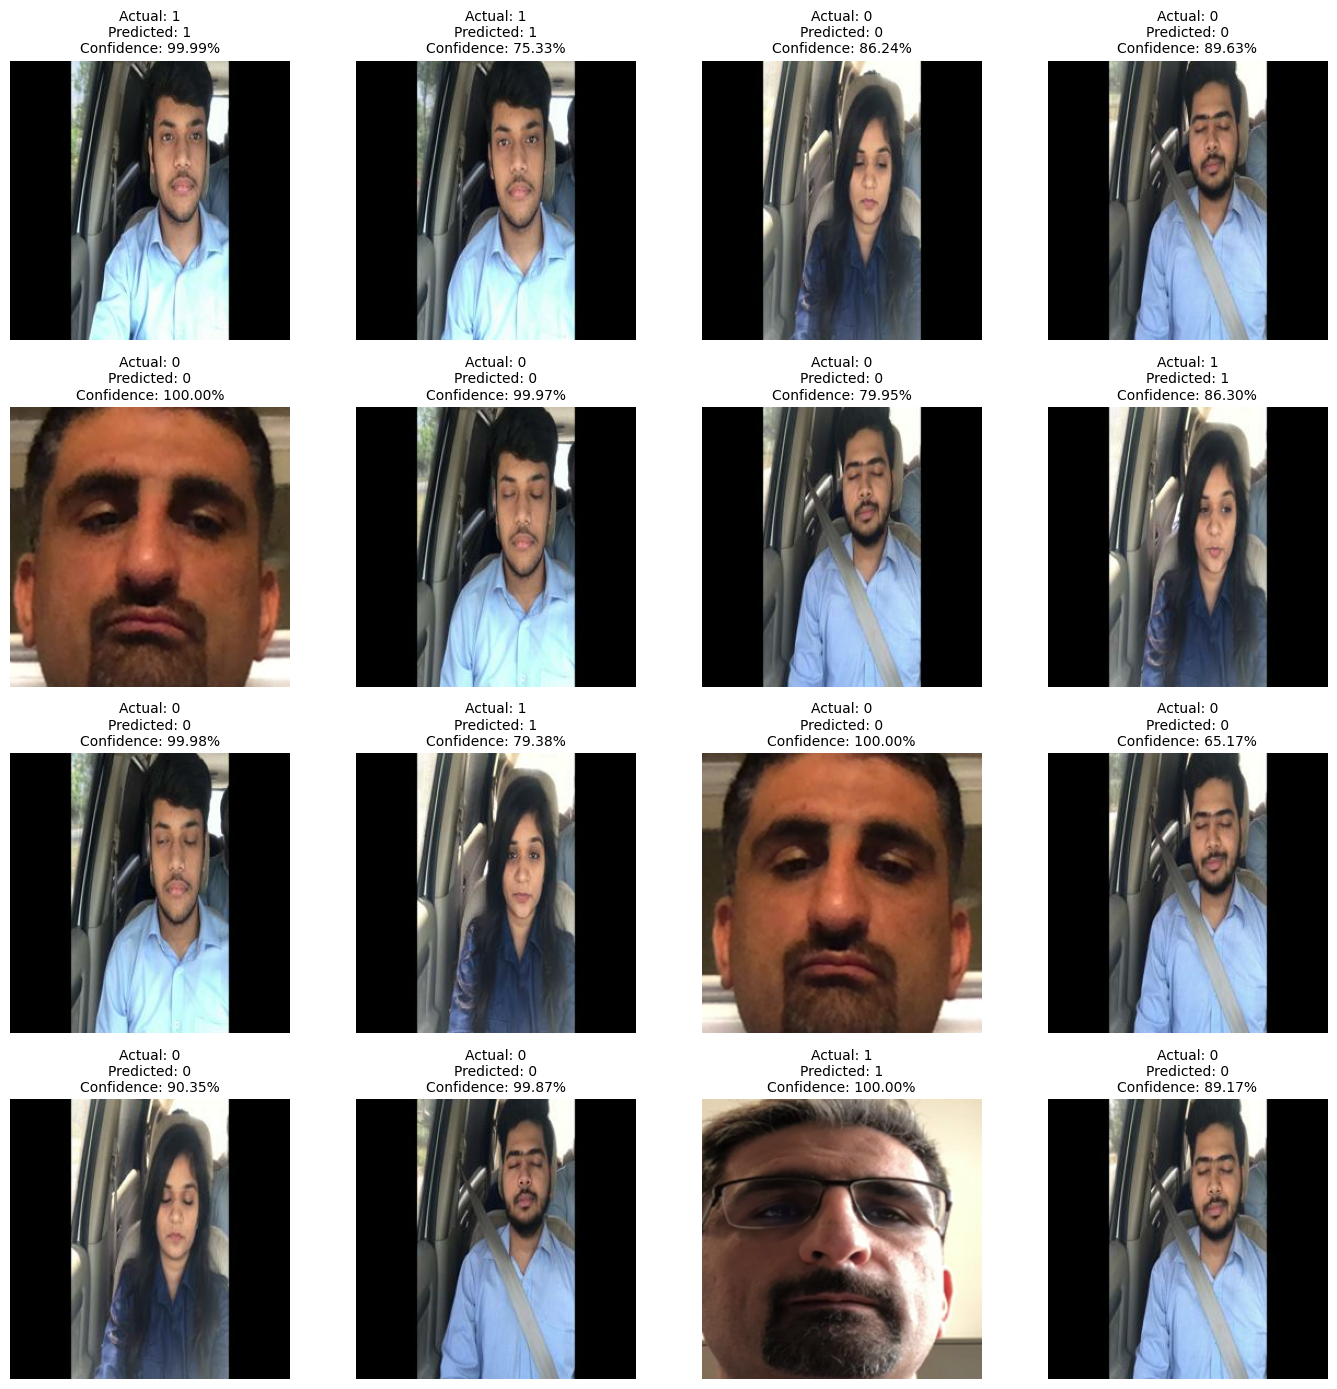

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to predict class and confidence
def predict(model, image, class_names):
    image = np.expand_dims(image.numpy(), axis=0)  # Expand dimensions for batch shape
    prediction = model.predict(image)[0]  # Get prediction for a single image

    # Handle binary classification (Sigmoid) and multi-class classification (Softmax)
    if prediction.shape == (1,):  # Binary classification case
        prediction_value = prediction.item()  # Extract scalar value
        confidence = max(prediction_value, 1 - prediction_value) * 100  # Convert to percentage
        predicted_class = int(prediction_value > 0.5)  # Threshold for binary classification
    else:  # Multi-class classification case
        confidence = float(np.max(prediction)) * 100  # Max probability as confidence
        predicted_class = np.argmax(prediction)  # Class with highest probability

    return class_names[predicted_class], confidence

# Plot predictions for 16 images (4x4 grid)
plt.figure(figsize=(14, 14))

for images, labels in test_ds.take(1):  # Take one batch from test dataset
    for i in range(16):  # Display 16 images
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to uint8 and show image

        # Predict class and confidence
        predicted_class, confidence = predict(model, images[i], class_names)
        actual_class = class_names[labels[i].numpy()]  # Convert label tensor to class name

        # Set title without emojis (to avoid font issues)
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", 
                  fontsize=10, color="black")
        plt.axis("off")

plt.tight_layout()  # Adjust subplot spacing
plt.show()


In [29]:
import os

# Define the model path
model_version = 1
model_dir = "../models"
model_path = f"{model_dir}/Drowsiness_Detection-V-{model_version}.keras"

# ✅ Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(model_path)
print(f"✅ Model saved at: {model_path}")


✅ Model saved at: ../models/Drowsiness_Detection-V-1.keras


In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,889,861 (98.76 MB)

 Trainable params: 8,629,953 (32.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,259,908 (65.84 MB)

 Model Weights (Layer-wise)

In [31]:
for layer in model.layers:
    print(f"🔹 Layer: {layer.name}")
    print(layer.get_weights())  # Weights and biases


🔹 Layer: rescaling
[]
🔹 Layer: random_flip
[]
🔹 Layer: random_rotation
[]
🔹 Layer: random_zoom
[]
🔹 Layer: conv2d
[array([[[[-8.79127085e-02, -8.92468989e-02,  1.14598647e-01,
          -1.15602449e-01,  5.01134768e-02,  1.36212394e-01,
           9.90362391e-02,  1.10137030e-01, -5.38650826e-02,
           1.24152742e-01,  1.09524421e-01,  5.26016615e-02,
          -6.51311800e-02, -8.50104168e-02, -1.16783353e-02,
           1.25654265e-01, -2.02068742e-02,  3.33779082e-02,
          -9.81789529e-02, -1.25556111e-01, -1.13910429e-01,
           8.56268108e-02,  3.67409699e-02, -3.03780735e-02,
           5.07738777e-02, -4.08141688e-02, -1.11647762e-01,
           2.03710143e-02, -9.33812261e-02, -1.19596511e-01,
           7.00817853e-02, -9.06115770e-02],
         [-2.68511157e-02, -2.28864793e-02,  1.03987612e-01,
           3.76362242e-02,  7.21224621e-02, -4.94317226e-02,
           2.97683384e-02,  8.74240622e-02, -8.13481733e-02,
           9.35297310e-02, -1.28586665e-01, -7.

In [42]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"🔹 Test Accuracy: {test_acc:.2%}")
print(f"🔹 Test Loss: {test_loss:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9501 - loss: 0.1255
🔹 Test Accuracy: 93.75%
🔹 Test Loss: 0.1308


Model’s Trainable Parameters

In [34]:
for layer in model.layers:
    print(f"🔹 Layer: {layer.name} - Trainable: {layer.trainable}")


🔹 Layer: rescaling - Trainable: True
🔹 Layer: random_flip - Trainable: True
🔹 Layer: random_rotation - Trainable: True
🔹 Layer: random_zoom - Trainable: True
🔹 Layer: conv2d - Trainable: True
🔹 Layer: max_pooling2d - Trainable: True
🔹 Layer: conv2d_1 - Trainable: True
🔹 Layer: max_pooling2d_1 - Trainable: True
🔹 Layer: conv2d_2 - Trainable: True
🔹 Layer: max_pooling2d_2 - Trainable: True
🔹 Layer: conv2d_3 - Trainable: True
🔹 Layer: max_pooling2d_3 - Trainable: True
🔹 Layer: flatten - Trainable: True
🔹 Layer: dense - Trainable: True
🔹 Layer: dropout - Trainable: True
🔹 Layer: dense_1 - Trainable: True


In [43]:
model.save("Drowsiness_Detection_V1.h5")


In [45]:
model.save_weights("Drowsiness_Detection_V1.weights.h5")
